In [1]:
#Nolan Roth================================================

import numpy as np
import matplotlib.pyplot as plt
from math import *

from scipy.optimize import curve_fit

% matplotlib inline

In [14]:
##DATA DEFINITIONS
xdata = np.array([1,3,5])
ydata = np.array([6,5,1])

xtimesysum = sum(ydata*xdata)
xsquaresum = sum(xdata**2)
ysum = sum(ydata)
xsum = sum(xdata)

N = len(xdata)
xtimesysum

26

In [7]:
##SLOPE FIT EQ
def fit_slope(xtimesysum, xsquaresum, ysum, xsum):
    return (N*xtimesysum-xsum*ysum)/(N*xsquaresum-xsum**2)
slope = fit_slope(xtimesysum, xsquaresum, ysum, xsum)
print("Slope of best fit line: ")
slope

Slope of best fit line: 


-1.25

In [5]:
##Y INTERCEPT OF BEST FIT LINE
def fit_intercept(xtimesysum, xsquaresum, ysum, xsum):
    return (xsquaresum*ysum-xsum*xtimesysum)/(N*xsquaresum-xsum**2)
yint = fit_intercept(xtimesysum, xsquaresum, ysum, xsum)
print("Y Intercept of best fit line: ")
yint

Y Intercept of best fit line: 


7.75

In [16]:
##SIGMA Y FOR BEST FIT LINE FOR USE IN LATER EQUATIONS
functionsum = sum((ydata - yint - slope*xdata)**2)
def sigy(N, functionsum):
    return ((1/(N-2))*functionsum)**(1/2)
sigmay = sigy(N, functionsum)
print("Sigma Y of best fit line: ")
sigmay

Sigma Y of best fit line: 


1.2247448713915889

In [9]:
##SIGMA M FOR THE BEST FIT LINE
def sigm(N, sigmay, xsquaresum, xsum):
    return sigmay*(N/(N*xsquaresum-xsum**2))**(1/2)
sigmam = sigm(N, sigmay, xsquaresum, xsum)
print("Slope error of best fit line: ")
sigmam

Slope error of best fit line: 


0.4330127018922193

In [10]:
##SIGMA Y INTERCEPT FOR BEST FIT LINE
def sigb(N, sigmay, xsquaresum, xsum):
    return sigmay*(xsquaresum/(N*xsquaresum-xsum**2))**(1/2)
sigmab = sigb(N, sigmay, xsquaresum, xsum)
print("Sigma Y of best fit line: ")
sigmab

Sigma Y of best fit line: 


1.4790199457749038

In [12]:
xfit = np.linspace(0,6,1000)
fit = slope*xfit+yint

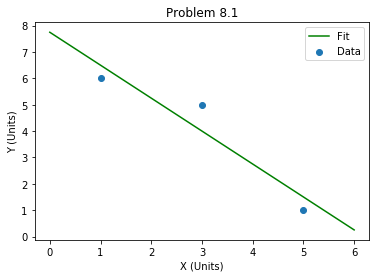

In [13]:
plt.scatter(xdata,ydata, label='Data')
plt.plot(xfit, fit, 'g', label='Fit')
plt.xlabel('X (Units)')
plt.ylabel('Y (Units)')
plt.legend(loc='best')
plt.title('Problem 8.1')

In [17]:
#8.7===========================================
#convert units first
mass = np.array([.2,.3,.4,.5,.6,.7,.8,.9])
length = ([.051,.055,.059,.068,.074,.075,.086,.094])
N = len(mass)

In [19]:
masstimeslensum = sum(mass*length)
masssquaresum = sum(mass**2)
lengthsum = sum(length)
masssum = sum(mass)

In [33]:
m = fit_slope(masstimeslensum, masssquaresum, lengthsum, masssum)
yint = fit_intercept(masstimeslensum, masssquaresum, lengthsum, masssum)

functionsum = sum((length - yint - m*mass)**2)
sigmay = sigy(N, functionsum)
sigmam = sigm(N, sigmay, masssquaresum, masssum)
sigmab = sigb(N, sigmay, masssquaresum, masssum)

In [34]:
#8.7 STuff
print('m:', m,'yiny:', yint,'sigmay:', sigmay,'sigmam:', sigmam,'sigmab:', sigmab)
g = 9.8
k = g/m
sigmak = g/sigmam
print('k:', k, 'sigmak:', sigmak, 'sigmam:', sigmam)

m: 0.0607142857143 yiny: 0.0368571428571 sigmay: 0.00242506750029 sigmam: 0.00374196039179 sigmab: 0.00222953021703
k: 161.411764706 sigmak: 2618.94808441 sigmam: 0.00374196039179


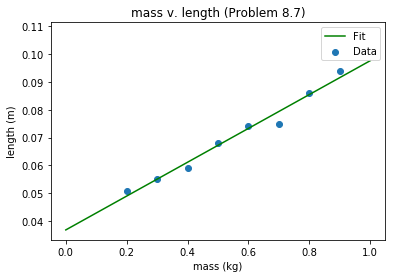

In [36]:
xfit = np.linspace(0,1,1000)
fit = m*xfit+yint
plt.scatter(mass, length, label='Data')
plt.plot(xfit, fit, 'g', label='Fit')
plt.xlabel('mass (kg)')
plt.ylabel('length (m)')
plt.title('mass v. length (Problem 8.7)')
plt.legend(loc='best')

In [38]:
#Problem 8.15============================================
x = np.array([1,2,3,4,5,6])
y = np.array([5.0,14.4,23.1,32.3,41.0,50.4])
N = len(x)

xtimesysum = sum(x*y)
xsquaresum = sum(x**2)
ysum = sum(y)
xsum = sum(x)

In [39]:
m = fit_slope(xtimesysum, xsquaresum, ysum, xsum)
yint = fit_intercept(xtimesysum, xsquaresum, ysum, xsum)

functionsum = sum((y - yint - m*x)**2)
sigmay = sigy(N, functionsum)
sigmam = sigm(N, sigmay, xsquaresum, xsum)
sigmab = sigb(N, sigmay, xsquaresum, xsum)

In [40]:
#8.15 Stuff
print('m:', m,'yiny:', yint,'sigmay:', sigmay,'sigmam:', sigmam,'sigmab:', sigmab)
gamma = 2*m
sigmagamma = 2*sigmam
print('gamma:', gamma, 'sigmagamma:', sigmagamma)

m: 9.02857142857 yiny: -3.9 sigmay: 0.20354009784 sigmam: 0.0486553896169 sigmab: 0.189485518984
gamma: 18.0571428571 sigmagamma: 0.0973107792339


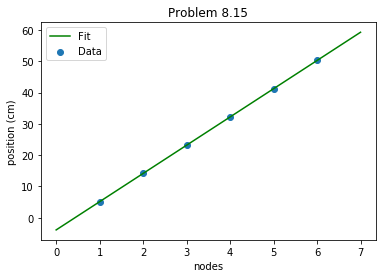

In [43]:
xfit = np.linspace(0,7,1000)
fit = m*xfit+yint

plt.scatter(x, y, label='Data')
plt.plot(xfit, fit, 'g', label='Fit')
plt.xlabel('nodes')
plt.ylabel('position (cm)')
plt.title('Problem 8.15')
plt.legend(loc='best')